# Regressão multipla

Exemplo de análise com regressão multipla usando os dados do Airbnb

## Objeto

Modelar a taxa mensal de avaliações (ocupação.)



In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as os

plt.style.use('ggplot')

df = pd.read_excel('Dados/DadosAirbnbIA.xls', sheet_name=0)

In [27]:
df.head()

,ID,ID da hospedagem,Nome da hospedagem,ID do Hospede,Nome do Hospede,Grupo de vizinhança,latitude,longitude,Tipo de hospedagem,Preço,locação mínima,Número de avaliações,Taxa mesal de ocupação,Número máximo de hóspedes,Disponibilidade anual
0,1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,4064749.0,-7397237,Quarto Privativo,125,1,9,0.21,6,365
1,2,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,4075362.0,-7398377,Ap/Casa inteira,79,1,45,0.38,2,355
2,6,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,4074767.0,-73975,Ap/Casa inteira,60,3,74,0.59,1,129
3,23,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,4067989.0,-7397798,Quarto Privativo,80,1,39,0.37,6,364
4,24,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,4068001.0,-7397865,Quarto Privativo,60,2,71,0.61,6,304


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         211 non-null    int64  
 1   ID da hospedagem           211 non-null    int64  
 2   Nome da hospedagem         211 non-null    object 
 3   ID do Hospede              211 non-null    int64  
 4   Nome do Hospede            211 non-null    object 
 5   Grupo de vizinhança        211 non-null    object 
 6   latitude                   209 non-null    float64
 7   longitude                  211 non-null    int64  
 8   Tipo de hospedagem         211 non-null    object 
 9   Preço                      211 non-null    int64  
 10  locação mínima             211 non-null    int64  
 11  Número de avaliações       211 non-null    int64  
 12  Taxa mesal de ocupação     211 non-null    float64
 13  Número máximo de hóspedes  211 non-null    int64  

In [29]:
df.describe()

,ID,ID da hospedagem,ID do Hospede,latitude,longitude,Preço,locação mínima,Número de avaliações,Taxa mesal de ocupação,Número máximo de hóspedes,Disponibilidade anual
count,211.000000,211.000000,2.110000e+02,2.090000e+02,2.110000e+02,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,300.440758,93579.838863,4.499419e+05,3.681804e+06,-6.570193e+06,91.672986,9.303318,36.853081,0.381137,2.037915,204.635071
std,174.646200,68721.006998,6.456684e+05,1.143813e+06,2.211115e+06,24.954476,12.487820,24.373917,0.228768,3.356370,108.078431
min,1.000000,2539.000000,2.787000e+03,4.072900e+04,-7.400821e+06,50.000000,1.000000,1.000000,0.010000,1.000000,10.000000
25%,136.500000,31728.500000,9.094850e+04,4.068111e+06,-7.398198e+06,70.000000,2.000000,17.500000,0.200000,1.000000,102.000000
50%,306.000000,71010.000000,3.066050e+05,4.071813e+06,-7.396128e+06,89.000000,4.000000,33.000000,0.360000,1.000000,223.000000
75%,453.500000,159782.000000,6.601125e+05,4.074503e+06,-7.394719e+06,110.000000,9.500000,54.000000,0.560000,2.000000,286.500000
max,593.000000,224006.000000,6.197784e+06,4.085879e+06,-7.396600e+04,149.000000,90.000000,97.000000,0.890000,28.000000,365.000000


In [30]:
df.drop(axis=0, columns=['ID', 'Nome da hospedagem', 'ID da hospedagem', 'ID do Hospede', 'Nome do Hospede'], inplace=True)

In [31]:
df.head()

,Grupo de vizinhança,latitude,longitude,Tipo de hospedagem,Preço,locação mínima,Número de avaliações,Taxa mesal de ocupação,Número máximo de hóspedes,Disponibilidade anual
0,Brooklyn,4064749.0,-7397237,Quarto Privativo,125,1,9,0.21,6,365
1,Manhattan,4075362.0,-7398377,Ap/Casa inteira,79,1,45,0.38,2,355
2,Manhattan,4074767.0,-73975,Ap/Casa inteira,60,3,74,0.59,1,129
3,Brooklyn,4067989.0,-7397798,Quarto Privativo,80,1,39,0.37,6,364
4,Brooklyn,4068001.0,-7397865,Quarto Privativo,60,2,71,0.61,6,304


In [32]:
df.columns = ['GrupoVizinhanca', 'Lat', 'Long', 'TipoHosp', 'Preco', 'LocMinima', 'NumAvaliacoes', 'TaxaMensalOcup', 'NumMaxHosp', 'DispAnual']

In [33]:
df.head()

,GrupoVizinhanca,Lat,Long,TipoHosp,Preco,LocMinima,NumAvaliacoes,TaxaMensalOcup,NumMaxHosp,DispAnual
0,Brooklyn,4064749.0,-7397237,Quarto Privativo,125,1,9,0.21,6,365
1,Manhattan,4075362.0,-7398377,Ap/Casa inteira,79,1,45,0.38,2,355
2,Manhattan,4074767.0,-73975,Ap/Casa inteira,60,3,74,0.59,1,129
3,Brooklyn,4067989.0,-7397798,Quarto Privativo,80,1,39,0.37,6,364
4,Brooklyn,4068001.0,-7397865,Quarto Privativo,60,2,71,0.61,6,304


## Analise de variância

In [34]:
result = os.ols(formula="TaxaMensalOcup ~ Preco + LocMinima + NumAvaliacoes + NumMaxHosp + DispAnual + GrupoVizinhanca + TipoHosp", data=df).fit()

print(result.params)

Intercept                       0.345433
GrupoVizinhanca[T.Manhattan]   -0.006742
TipoHosp[T.Quarto Privativo]    0.011873
Preco                          -0.002290
LocMinima                       0.000299
NumAvaliacoes                   0.006857
NumMaxHosp                     -0.001179
DispAnual                      -0.000042
dtype: float64


In [35]:
print(result.summary())

OLS Regression Results                            
Dep. Variable:         TaxaMensalOcup   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     495.0
Date:                Sun, 23 Aug 2020   Prob (F-statistic):          7.54e-124
Time:                        10:40:08   Log-Likelihood:                 317.67
No. Observations:                 211   AIC:                            -619.3
Df Residuals:                     203   BIC:                            -592.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.3454     

### Analisando os resultados.

O modelo é significativo dado a analise da distribuição F (F-statistic: 495.0) gerando um valor P-Value (Intercept  0.000).

Analisando as analises da distribuição P, com uma margem de corte de 5% (0,05), identificamos que as variaveis mais significativas são:

* Preco: P>|t| = 0.000

* NumAvaliacoes: P>|t| = 0.000                



In [36]:
aov_table = sm.stats.anova_lm(result)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
GrupoVizinhanca,1.0,0.045454,0.045454,15.168761,1.334091e-04
TipoHosp,1.0,0.005867,0.005867,1.957788,1.632763e-01
Preco,1.0,9.964083,9.964083,3325.181421,7.849217e-128
LocMinima,1.0,0.001088,0.001088,0.362982,5.475269e-01
NumAvaliacoes,1.0,0.359643,0.359643,120.018785,3.043419e-22
NumMaxHosp,1.0,0.001938,0.001938,0.646802,4.221993e-01
DispAnual,1.0,0.003955,0.003955,1.319708,2.519963e-01
Residual,203.0,0.608300,0.002997,NaN,NaN


### Reavaliando o modelo apenas com as variaveis com maior siginificancia.

In [37]:
df.head()

,GrupoVizinhanca,Lat,Long,TipoHosp,Preco,LocMinima,NumAvaliacoes,TaxaMensalOcup,NumMaxHosp,DispAnual
0,Brooklyn,4064749.0,-7397237,Quarto Privativo,125,1,9,0.21,6,365
1,Manhattan,4075362.0,-7398377,Ap/Casa inteira,79,1,45,0.38,2,355
2,Manhattan,4074767.0,-73975,Ap/Casa inteira,60,3,74,0.59,1,129
3,Brooklyn,4067989.0,-7397798,Quarto Privativo,80,1,39,0.37,6,364
4,Brooklyn,4068001.0,-7397865,Quarto Privativo,60,2,71,0.61,6,304


In [38]:
modelo = os.ols(formula='TaxaMensalOcup ~ Preco + NumAvaliacoes', data=df).fit()

print(modelo.summary())

OLS Regression Results                            
Dep. Variable:         TaxaMensalOcup   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1737.
Date:                Sun, 23 Aug 2020   Prob (F-statistic):          1.57e-130
Time:                        10:40:09   Log-Likelihood:                 315.54
No. Observations:                 211   AIC:                            -625.1
Df Residuals:                     208   BIC:                            -615.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3543      0.077      4.588      0.000       0.202     

In [39]:
sm.stats.anova_lm(modelo)

,df,sum_sq,mean_sq,F,PR(>F)
Preco,1.0,10.013362,10.013362,3355.497755,2.746313e-130
NumAvaliacoes,1.0,0.356259,0.356259,119.382965,2.955738e-22
Residual,208.0,0.620707,0.002984,NaN,NaN


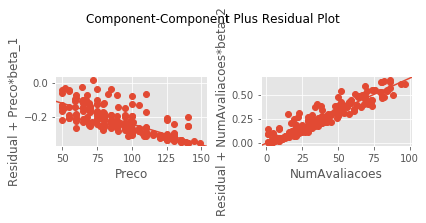

In [40]:
fig = sm.graphics.plot_ccpr_grid(modelo)
fig.tight_layout(pad=1.0)


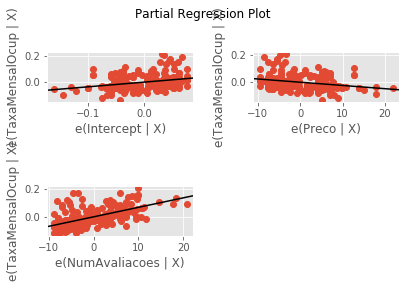

In [41]:
fig = sm.graphics.plot_partregress_grid(modelo)
fig.tight_layout(pad=2.0)

(array([ 4., 24., 51., 68., 22., 16., 15.,  5.,  4.,  2.]),
 array([-0.11666867, -0.0850385 , -0.05340833, -0.02177817,  0.009852  ,
         0.04148217,  0.07311233,  0.1047425 ,  0.13637267,  0.16800283,
         0.199633  ]),
 <a list of 10 Patch objects>)

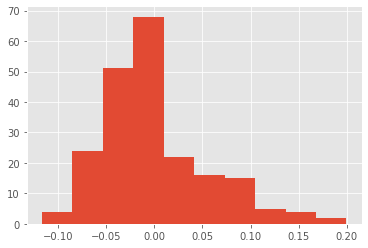

In [42]:
plt.hist(modelo.resid)

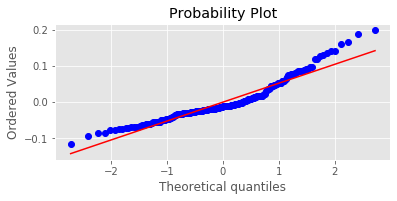

In [43]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(modelo.resid, plot=ax, fit=True)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = df[['Preco', 'NumAvaliacoes']].values
y = df['TaxaMensalOcup'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
print(modelo.intercept_)
print(modelo.coef_)

0.3839682539682541
[-0.08094652  0.14896669]


In [46]:
y_pred = modelo.predict(X_train)

In [47]:
mean_squared_error(y_train, y_pred)

0.003037399121636357

In [48]:
y_pred = modelo.predict(X_test)
mean_squared_error(y_test, y_pred)

0.002866295753110408

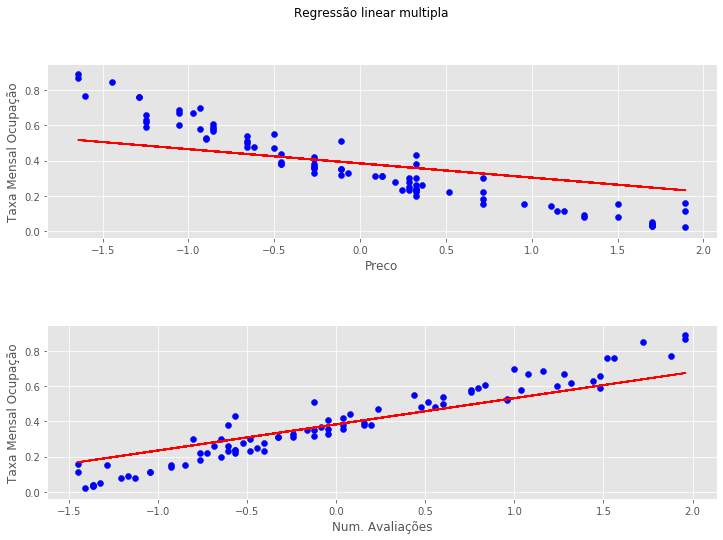

In [49]:
fig = plt.figure(figsize=(12,8))

fig.suptitle('Regressão linear multipla')

plt.subplot(211)
plt.scatter(X_test[:,0], y_test, c='blue')
plt.plot(X_test[:,0], modelo.coef_[0] * X_test[:,0] + modelo.intercept_, c='red')
plt.xlabel('Preco')
plt.ylabel('Taxa Mensal Ocupação')

plt.subplot(212)
plt.scatter(X_test[:,1], y_test, c='blue')
plt.plot(X_test[:,1], modelo.coef_[1] * X_test[:,1] + modelo.intercept_, c='red')
plt.xlabel('Num. Avaliações')
plt.ylabel('Taxa Mensal Ocupação')

plt.subplots_adjust(hspace=0.5)

plt.show()